# Image Enconding

In [2]:
import os
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm 

In [4]:
def create_color_to_label_map(mask_folder_path):
    """
    Scans all masks in a folder to find unique colors and create a mapping
    from color to a class label.
    """
    print(f"Scanning masks in '{mask_folder_path}'...")
    
    unique_colors = set()
    

    mask_files = os.listdir(mask_folder_path)
    print(mask_files)
   
    for filename in tqdm(mask_files, desc="Finding unique colors"):
        mask_path = os.path.join(mask_folder_path, filename)
        
        # Open the mask image and convert to a NumPy array
        mask_bgr = cv2.imread(mask_path)

        mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
        # Reshape the (H, W, C) array to (H*W, C) to get a list of pixels
        pixels = mask_rgb.reshape(-1, 3)
        
        # Get unique rows (unique RGB colors)
        unique_pixel_colors = np.unique(pixels, axis=0)
        
        # Add the unique colors found in this image to our overall set
        for color in unique_pixel_colors:
            unique_colors.add(tuple(color))
            

    sorted_colors = sorted(list(unique_colors))
    
    # Create the color-to-label dictionary
    color_to_label = {color: label for label, color in enumerate(sorted_colors)}
    
    print("\nScan complete!")
    print(f"Found {len(color_to_label)} unique classes.")
    
    return color_to_label

In [5]:
mask_path = "data_dataset_voc/SegmentationClass"
COLOR_TO_LABEL = create_color_to_label_map(mask_path)
COLOR_TO_LABEL

Scanning masks in 'data_dataset_voc/SegmentationClass'...
['cat.0.png', 'cat.1.png', 'cat.10.png', 'cat.100.png', 'cat.101.png', 'cat.102.png', 'cat.103.png', 'cat.104.png', 'cat.105.png', 'cat.106.png', 'cat.107.png', 'cat.108.png', 'cat.109.png', 'cat.11.png', 'cat.110.png', 'cat.111.png', 'cat.112.png', 'cat.113.png', 'cat.114.png', 'cat.115.png', 'cat.116.png', 'cat.117.png', 'cat.118.png', 'cat.119.png', 'cat.12.png', 'cat.120.png', 'cat.121.png', 'cat.122.png', 'cat.123.png', 'cat.124.png', 'cat.125.png', 'cat.126.png', 'cat.127.png', 'cat.128.png', 'cat.129.png', 'cat.13.png', 'cat.130.png', 'cat.131.png', 'cat.132.png', 'cat.133.png', 'cat.134.png', 'cat.135.png', 'cat.136.png', 'cat.137.png', 'cat.138.png', 'cat.139.png', 'cat.14.png', 'cat.140.png', 'cat.141.png', 'cat.142.png', 'cat.143.png', 'cat.144.png', 'cat.145.png', 'cat.146.png', 'cat.147.png', 'cat.148.png', 'cat.149.png', 'cat.15.png', 'cat.150.png', 'cat.151.png', 'cat.152.png', 'cat.153.png', 'cat.154.png', 'cat.1

Finding unique colors: 100%|██████████| 402/402 [00:21<00:00, 19.07it/s]


Scan complete!
Found 3 unique classes.


{(np.uint8(0), np.uint8(0), np.uint8(0)): 0,
 (np.uint8(0), np.uint8(128), np.uint8(0)): 1,
 (np.uint8(128), np.uint8(0), np.uint8(0)): 2}

In [6]:
import numpy as np
import cv2
from PIL import Image

def encode_mask_to_grayscale(mask_path, color_map):
    """
    Converts an RGB segmentation mask to a grayscale mask with class labels.
    """
    mask_bgr = cv2.imread(mask_path)
    mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
    height, width, _ = mask_rgb.shape
    
    # Create an empty grayscale mask (height x width)
    mask_grayscale = np.zeros((height, width), dtype=np.uint8)
    
    # For each color in our map, find where it is in the mask and assign the label
    for color, label in color_map.items():
        # Find pixels matching the color
        matches = np.where(np.all(mask_rgb == color, axis=-1))
        mask_grayscale[matches] = label
        
    return mask_grayscale




In [7]:
import os
from tqdm import tqdm
import cv2

# --- 1. Define Input and Output Directories ---
input_mask_dir = "data_dataset_voc/SegmentationClass"
output_mask_dir = "data_dataset_voc/SegmentationClassEncoded"

# --- 2. Create the Output Directory if it doesn't exist ---
os.makedirs(output_mask_dir, exist_ok=True)
print(f"Encoded masks will be saved to: {output_mask_dir}")

# --- 3. Loop Through All Masks, Encode, and Save ---
mask_filenames = os.listdir(input_mask_dir)

for filename in tqdm(mask_filenames, desc="Encoding masks"):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        input_path = os.path.join(input_mask_dir, filename)
        encoded_mask = encode_mask_to_grayscale(input_path, COLOR_TO_LABEL)
        output_path = os.path.join(output_mask_dir, filename)
        cv2.imwrite(output_path, encoded_mask)

print(f"\n✅ Successfully processed and saved {len(mask_filenames)} masks.")

Encoded masks will be saved to: data_dataset_voc/SegmentationClassEncoded


Encoding masks: 100%|██████████| 402/402 [00:03<00:00, 108.17it/s]


✅ Successfully processed and saved 402 masks.


## Read Encoded Mask

Randomly selected file: cat.1.png


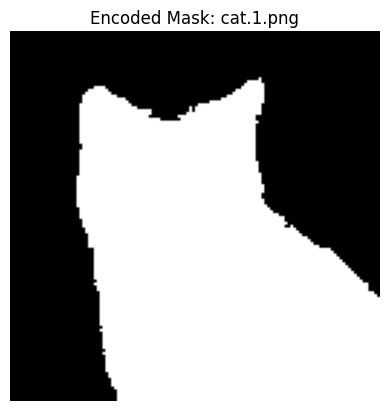

In [27]:
import matplotlib.pyplot as plt
import random

encoded_mask_dir = "data_dataset_voc/SegmentationClassEncoded"


all_mask_files = os.listdir(encoded_mask_dir)
random_filename = random.choice(all_mask_files)
print(f"Randomly selected file: {random_filename}")

random_mask_path = os.path.join(encoded_mask_dir, random_filename)


new_grayscale_label_mask = cv2.imread(random_mask_path, cv2.IMREAD_GRAYSCALE)

# Display the image
if new_grayscale_label_mask is not None:
    plt.imshow(new_grayscale_label_mask, cmap='gray')
    plt.title(f"Encoded Mask: {random_filename}")
    plt.axis("off")
    plt.show()
else:
    print(f"Error: Could not load the image at {random_mask_path}")

In [48]:
class_names_path = "data_dataset_voc/class_names.txt"

with open(class_names_path, 'r') as f:
    for i, line in enumerate(f):
        print(f"Label {i}: {line.strip()}")

Label 0: _background_
Label 1: dog
Label 2: cat
